In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('nba.csv')

In [21]:
data =pd.DataFrame(data)

In [22]:
data.head()

,rank,player,position,teams,total_points,total_games,points_per_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country
0,1,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1969–1975)\nLos Angeles Laker...,38387,1560,24.6,15837,1,6712,1947,0,1995.0,USA
1,2,LeBron James,SF,"Cleveland Cavaliers (2003–2010, 2014–2018)\nMi...",37965,1397,27.2,13896,2201,7972,1984,1,NaN,USA
2,3,Karl Malone,PF,Utah Jazz (1985–2003)\nLos Angeles Lakers (200...,36928,1476,25.0,13528,85,9787,1963,0,2010.0,USA
3,4,Kobe Bryant,SG,Los Angeles Lakers (1996–2016),33643,1346,25.0,11719,1827,8378,1978-2020,0,2020.0,USA
4,5,Michael Jordan,SG,"Chicago Bulls (1984–1993, 1995–1998)\nWashingt...",32292,1072,30.1,12192,581,7327,1963,0,2009.0,USA


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                50 non-null     int64  
 1   player              50 non-null     object 
 2   position            50 non-null     object 
 3   teams               50 non-null     object 
 4   total_points        50 non-null     int64  
 5   total_games         50 non-null     int64  
 6   points_per_game     50 non-null     float64
 7   field_goals         50 non-null     int64  
 8   three_points_goals  50 non-null     int64  
 9   free_shots          50 non-null     int64  
 10  born                50 non-null     object 
 11  active_player       50 non-null     int64  
 12  hall_of_fame        34 non-null     float64
 13  country             50 non-null     object 
dtypes: float64(2), int64(7), object(5)
memory usage: 5.6+ KB


In [7]:
data.corr()

,rank,total_points,total_games,points_per_game,field_goals,three_points_goals,free_shots,active_player,hall_of_fame
rank,1.000000,-0.917279,-0.521923,-0.394343,-0.846027,-0.010761,-0.699225,0.063130,-0.152547
total_points,-0.917279,1.000000,0.535357,0.439965,0.938364,0.033154,0.706383,-0.031979,0.125872
total_games,-0.521923,0.535357,1.000000,-0.508344,0.561769,0.132305,0.148026,-0.175789,0.437999
points_per_game,-0.394343,0.439965,-0.508344,1.000000,0.351095,-0.102317,0.548578,0.119715,-0.394650
field_goals,-0.846027,0.938364,0.561769,0.351095,1.000000,-0.185592,0.493566,-0.141432,0.025107
three_points_goals,-0.010761,0.033154,0.132305,-0.102317,-0.185592,1.000000,-0.067327,0.430284,0.534229
free_shots,-0.699225,0.706383,0.148026,0.548578,0.493566,-0.067327,1.000000,-0.015230,0.023824
active_player,0.063130,-0.031979,-0.175789,0.119715,-0.141432,0.430284,-0.015230,1.000000,NaN
hall_of_fame,-0.152547,0.125872,0.437999,-0.394650,0.025107,0.534229,0.023824,NaN,1.000000


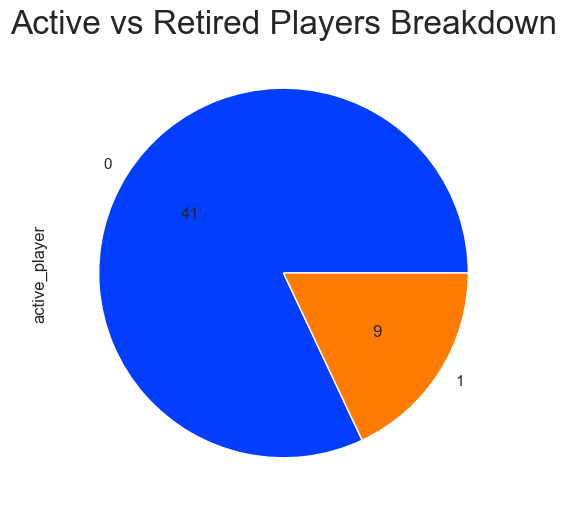

In [8]:
sns.set(rc = {'figure.figsize': (12, 6)})
colors = sns.color_palette('bright')

value = data['active_player'].value_counts()
ax = data['active_player'].value_counts().plot(kind = 'pie', 
        colors = colors,autopct=lambda x: '{:.0f}'.format(x*value.sum()/100))
ax.set_title('Active vs Retired Players Breakdown', size = 24)

plt.show()

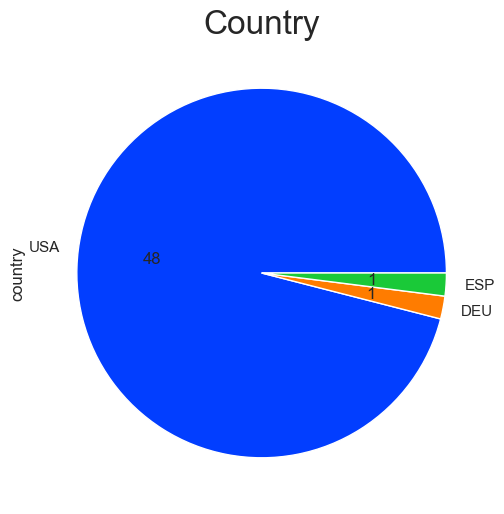

In [9]:
sns.set(rc = {'figure.figsize': (12, 6)})
colors = sns.color_palette('bright')

ax = data['country'].value_counts().plot(kind = 'pie', colors = colors,
                    autopct=lambda x: '{:.0f}'.format(x*value.sum()/100))
ax.set_title('Country', size = 24)

value=data['country'].value_counts()

plt.show()

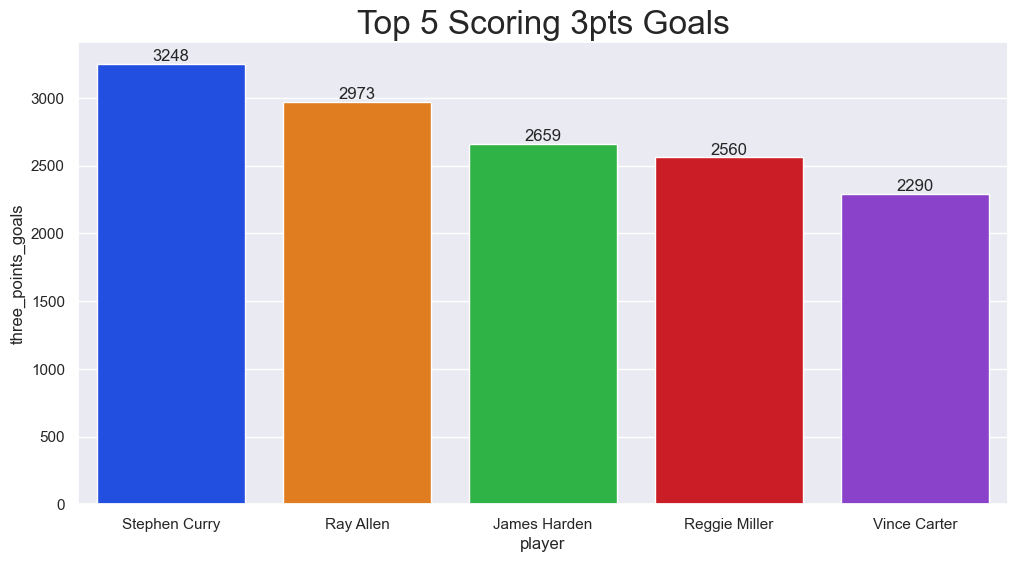

In [10]:
data_3pts = data.sort_values('three_points_goals',ascending=False).head()

sns.set(rc = {'figure.figsize': (12, 6)})

ax = sns.barplot(data_3pts,
                 x = 'player',
                 y = 'three_points_goals',
                 palette = 'bright')
ax.set_title('Top 5 Scoring 3pts Goals', size = 24)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

/var/folders/42/lc86x4qs6c3d2sj6hxkq31v80000gn/T/ipykernel_1734/2436179363.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x= data_point['points_per_game'], y=data_point['player'],estimator= ('max')


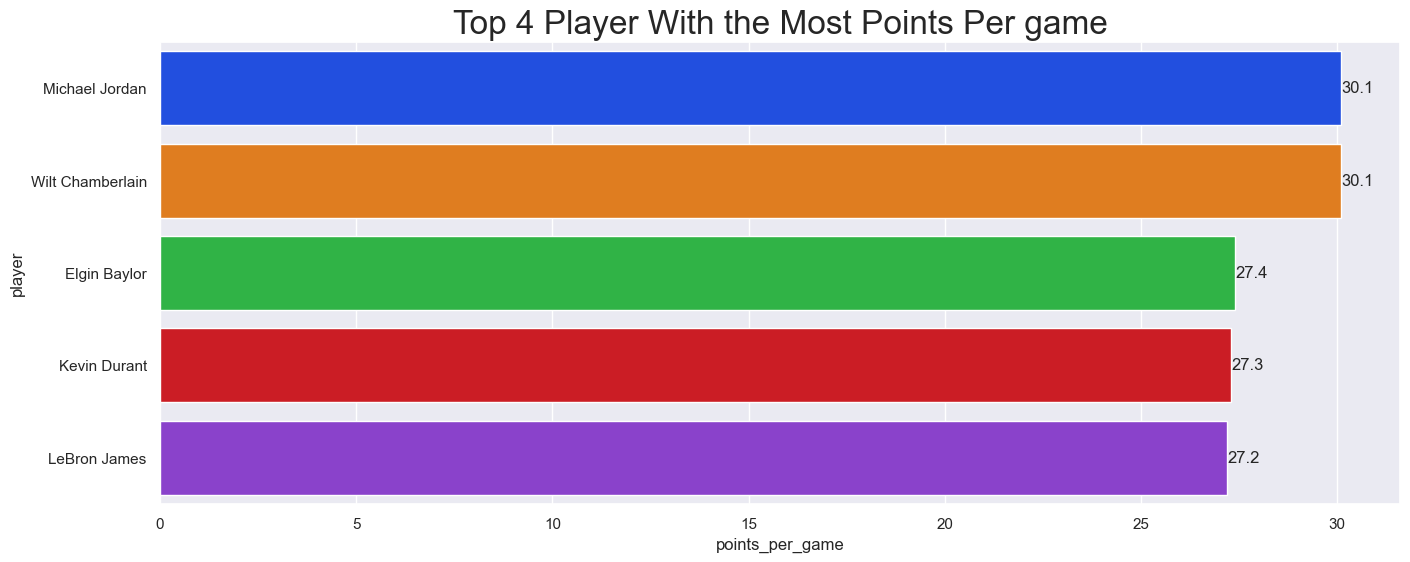

In [39]:
data_point = data.sort_values('points_per_game',ascending=False).head()

plt.figure(figsize=(16,6))

ax=sns.barplot(x= data_point['points_per_game'], y=data_point['player'],estimator= ('max')
               ,palette = 'bright',ci=None)
ax.set_title('Top 4 Player With the Most Points Per game', size = 24)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

/var/folders/42/lc86x4qs6c3d2sj6hxkq31v80000gn/T/ipykernel_1734/832661840.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data_field,


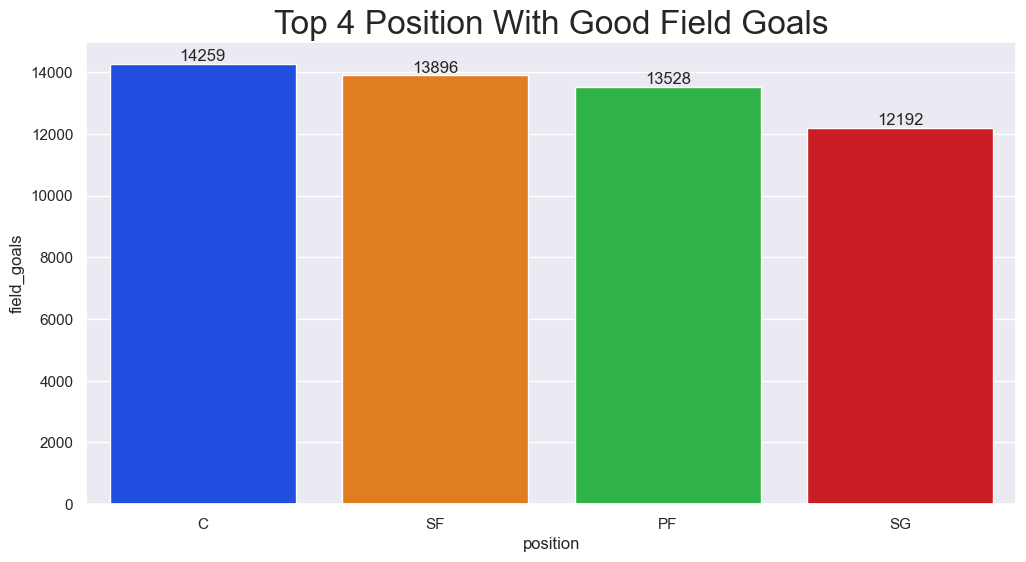

In [44]:
data_field = data.sort_values('field_goals',ascending=False).head()

sns.set(rc = {'figure.figsize': (12, 6)})

ax = sns.barplot(data_field,
                 x = 'position',
                 y = 'field_goals',
                 palette = 'bright',ci=None)
ax.set_title('Top 4 Position With Good Field Goals', size = 24)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [45]:
data_loyalteam = data.copy()
data_loyalteam = data_loyalteam [['player','position','teams']]
data_loyalteam['teams_played']= data_loyalteam['teams'].apply(lambda x: len(x.split("\n")))

In [46]:
data_loyalteam[data_loyalteam['teams_played'] == 1]

,player,position,teams,teams_played
3,Kobe Bryant,SG,Los Angeles Lakers (1996–2016),1
5,Dirk Nowitzki,PF/C,Dallas Mavericks (1998–2019),1
15,Tim Duncan,PF/C,San Antonio Spurs (1997–2016),1
17,John Havlicek,SF/SG,Boston Celtics (1962–1978),1
21,Reggie Miller,SG,Indiana Pacers (1987–2005),1
22,Jerry West,PG/SG,Los Angeles Lakers (1960–1974),1
32,Elgin Baylor,SF,Minneapolis/Los Angeles Lakers (1958–1971),1
35,Larry Bird,SF/PF,Boston Celtics (1979–1992),1
36,Hal Greer,SG/PG,Syracuse Nationals/Philadelphia 76ers (1958–1973),1
41,Bob Pettit,PF/C,Milwaukee/St. Louis Hawks (1954–1965),1


In [47]:
data_loyalteam[data_loyalteam['teams_played'] > 5].sort_values('teams_played')

,player,position,teams,teams_played
7,Shaquille O'Neal,C,Orlando Magic (1992–1996)\nLos Angeles Lakers ...,6
8,Carmelo Anthony,SF,Denver Nuggets (2003–2011)\nNew York Knicks (2...,6
48,Tom Chambers,PF,San Diego Clippers (1981–1983)\nSeattle SuperS...,6
49,Antawn Jamison,PF/SF,Golden State Warriors (1999–2003)\nDallas Mave...,6
9,Moses Malone,C,Buffalo Braves (1976)\nHouston Rockets (1976–1...,7
30,Adrian Dantley,SF,Buffalo Braves (1976–1977)\nIndiana Pacers (19...,7
47,Joe Johnson,SG/SF,"Boston Celtics (2001–2002, 2021)\nPhoenix Suns...",7
19,Vince Carter,SG/SF,Toronto Raptors (1999–2004)\nNew Jersey Nets (...,8
